# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [2]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [1]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# a24a79c4dffff141f062ce2dc6e01a975b3c94e1
wandb.login()

wandb: Currently logged in as: miraellax. Use `wandb login --relogin` to force relogin


True

In [2]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
# import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torch.utils.data import ConcatDataset
from lightning.pytorch.callbacks import LearningRateFinder
from lightning.pytorch import Trainer, LightningModule
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

# You may add any imports you need

In [3]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(42)

In [4]:
# !wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip


## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [4]:
# Посчитаны заранее
d_mean = [0.48023693, 0.44806705, 0.39750367]
d_std = [0.3436322235107422, 0.3342111037826538, 0.36121227874755857]

# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(d_mean, d_std),
])
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(d_mean, d_std),
])
train_transform_aug = transforms.Compose([
    transforms.ColorJitter(brightness=.2, hue=.1),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAdjustSharpness(2),
    transforms.RandomAutocontrast(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(d_mean, d_std),
])

train_dataset = ImageFolder('C:\\Users\\Alex\\PycharmProjects\\pythonProject\\dataset\\train', transform=train_transform)
train_dataset_aug = ImageFolder('C:\\Users\\Alex\\PycharmProjects\\pythonProject\\dataset\\train', transform=train_transform_aug)
val_dataset = ImageFolder('C:\\Users\\Alex\\PycharmProjects\\pythonProject\\dataset\\val', transform=val_transform)

concat_train = ConcatDataset([train_dataset, train_dataset_aug])
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET


# train_dataloader = DataLoader(train_dataset_aug, batch_size=32, shuffle=True, num_workers=7)
train_dataloader = DataLoader(concat_train, batch_size=32, shuffle=True, num_workers=7,persistent_workers=True, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=7, persistent_workers=True, pin_memory=True)

In [6]:
# # Поиск значений для нормализации на неаугментированных данных

# train_dl = DataLoader(train_dataset, batch_size=1000) # Равное количество картинок в каждом батче - 100
# m = []
# m_squared = []

# # mean
# i =0
# for batch, target in iter(train_dl):
#   batch_mean = ((batch).mean(axis=(0, 2, 3)))
#   m.append(batch_mean.tolist())
#   i += 1
#   print(i)

# # mean [0.48023693, 0.44806705, 0.39750367]
# our_mean = np.mean(m, axis=0)
# print(our_mean)

In [7]:
# # std - https://www.scribbr.com/statistics/standard-deviation/
# sr = 0
# sg = 0
# sb = 0
# for batch, target in iter(train_dl):
#   for elem in batch:
#     elem[0] -= our_mean[0]
#     elem[1] -= our_mean[1]
#     elem[2] -= our_mean[2]
#   sr += torch.sum(elem[0]**2).item()
#   sg += torch.sum(elem[1]**2).item()
#   sb += torch.sum(elem[2]**2).item()

# # std [0.3436322235107422, 0.3342111037826538, 0.36121227874755857]
# print(sr/len(train_dataset))
# print(sg/len(train_dataset))
# print(sb/len(train_dataset))

In [8]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


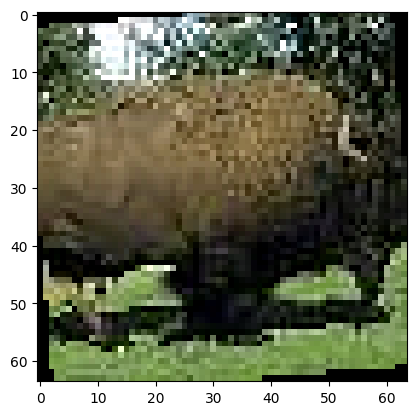

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


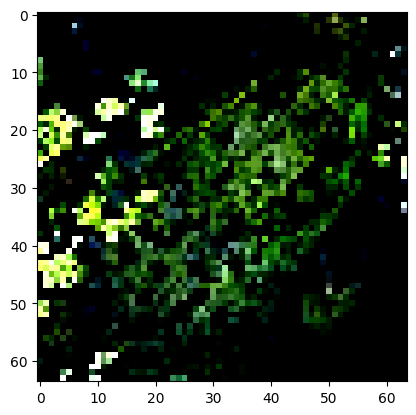

In [115]:
for batch in train_dataloader:
    images, class_nums = batch
    im1 = images[1]
    im1[0] = im1[0].mul(d_std[0]) + d_mean[0]
    im1[1] = im1[1].mul(d_std[1]) + d_mean[1]
    im1[2] = im1[2].mul(d_std[2]) + d_mean[2]

    plt.imshow(im1.permute(1, 2, 0)) # Нормализация работает правильно
    plt.show()
    plt.imshow(images[12].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [5]:
# class YourNet(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         # YOUR CODE HERE
#         pass

#     def _forward(self, x):
#         # runs the Neural Network
#         # YOUR CODE HERE
#         pass

#     def forward(self, images, target=None):
#         # YOUR CODE HERE
#         pass

#     def get_accuracy(self, reset=False):
#         # YOUR CODE HERE
#         pass

from torchvision.models import resnet18, resnet50, resnet101
seed_everything(42)
# num_classes заменяет последний слой на линейный с 200 выходами
YourNet = resnet18(weights=None, num_classes=200)
# YourNet = resnet50(weights=None, num_classes=200)

# print(YourNet)

### Тренировочный класс lightning

In [41]:
# Код частично взят из 4 семинара - https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb
class YourModule(LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LinearLR(self.optimizer, start_factor=0.01)
        # self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=30, gamma=0.8)
        return {"optimizer": self.optimizer, "lr_scheduler": self.scheduler}

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        pred = self.model(images)
        loss = self.criterion(pred, target)
        # wandb лог
        self.log('train_loss ', loss, on_step=False, on_epoch=True)
        # print("Train loss: ", loss)

        # step every x epochs
        if self.trainer.is_last_batch and (self.trainer.current_epoch + 1) % 2 == 0:
          self.scheduler.step()
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        pred = self.model(images)
        loss = self.criterion(pred, target)
        # wandb лог
        self.log('val_loss ', loss, on_step=False, on_epoch=True)
        # print("Val loss: ", loss)


In [7]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda" if torch.cuda.is_available() else "cpu"

lr = 0.05
lr = 1.445439770745928e-06 # lr лучшей модели
model = YourNet.to(device)
module = YourModule(model, lr)

In [8]:
wandb_logger.watch(model)

wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [17]:
trainer = Trainer(logger=wandb_logger, max_epochs=15, callbacks=[LearningRateFinder(), EarlyStopping(monitor="val_loss ", mode="min", check_on_train_epoch_end=False)])
# trainer = Trainer(logger=wandb_logger, max_epochs=10)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [18]:
trainer.fit(module, train_dataloader, val_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 1.445439770745928e-06
Restoring states from the checkpoint path at C:\Users\Alex\PycharmProjects\pythonProject\.lr_find_5a22ea24-f568-49c3-84f6-290cb38975ca.ckpt
Restored all states from the checkpoint at C:\Users\Alex\PycharmProjects\pythonProject\.lr_find_5a22ea24-f568-49c3-84f6-290cb38975ca.ckpt

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.3 M
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)
Restored all states from the checkpoint at C:\Users\Alex\PycharmProjects\pythonProject\.lr_find_5a22ea24-f568-49c3-84f6-290cb38975ca.ckpt


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=15` reached.


In [63]:
trainer.save_checkpoint('_best_model_task1.pth')
wandb.save('_best_model_task1')
wandb.finish()

### Валидация результатов задания

In [19]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            pred = model(images)
            # acc_batch = model.get_accuracy(reset=True)
            acc_batch = torch.sum(pred.argmax() == labels)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [60]:
# wandb.restore('SecondModel10epochsNorm.pth')
# model = wandb.restore('model', run_path="miraellax/lightning_logs/Artifacts/model/model-9o2pknb8/v19/files")

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy.cpu() / 0.44, 0, 10):.2f} баллов")


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 148.13it/s]

Оценка за это задание составит 10.00 баллов


In [61]:
print(accuracy)

tensor(0.4409, device='cuda:0')


In [31]:
# Проверка чекпоинта модели - веса сохранены
# waaa = torch.load("C:\\Users\\Alex\\PycharmProjects\\pythonProject\\best_model_task1.pth")

In [59]:
print(waaa.keys(), "\n")
print("LR scheduler: ", waaa["lr_schedulers"], "\n")
print("Callbacks: ", waaa["callbacks"], "\n")
print("Epoch: ", waaa["epoch"], "\n")
print("Global_step: ", waaa["global_step"], "\n")
# print("State_dict: ", waaa["state_dict"], "\n") # веса

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers']) 

LR scheduler:  [{'start_factor': 0.01, 'end_factor': 1.0, 'total_iters': 5, 'base_lrs': [1.445439770745928e-06], 'last_epoch': 22, 'verbose': False, '_step_count': 23, '_get_lr_called_within_step': False, '_last_lr': [1.445439770745928e-06]}] 

Callbacks:  {"EarlyStopping{'monitor': 'val_loss ', 'mode': 'min'}": {'wait_count': 0, 'stopped_epoch': 0, 'best_score': tensor(2.8336, device='cuda:0'), 'patience': 3}, "ModelCheckpoint{'monitor': None, 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}": {'monitor': None, 'best_model_score': None, 'best_model_path': '.\\lightning_logs\\bjpu4b11\\checkpoints\\epoch=14-step=93650.ckpt', 'current_score': None, 'dirpath': '.\\lightning_logs\\bjpu4b11\\checkpoints', 'best_k_models': {}, 'kth_best_model_path': '', 'kth_value': tensor(inf), 'last_model_path': ''}} 

Epoch: 

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [4]:
# Посчитаны заранее
d_mean = [0.48023693, 0.44806705, 0.39750367]
d_std = [0.3436322235107422, 0.3342111037826538, 0.36121227874755857]

# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(d_mean, d_std),
])
val_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(d_mean, d_std),
])
train_transform_aug = transforms.Compose([
    transforms.ColorJitter(brightness=.2, hue=.1),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAdjustSharpness(2),
    transforms.RandomAutocontrast(),
    transforms.RandomRotation(30),
    # Ресайз для резнет, хотя она и сама это делает
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(d_mean, d_std),
])

train_dataset = ImageFolder('C:\\Users\\Alex\\PycharmProjects\\pythonProject\\dataset\\train', transform=train_transform)
train_dataset_aug = ImageFolder('C:\\Users\\Alex\\PycharmProjects\\pythonProject\\dataset\\train', transform=train_transform_aug)
val_dataset = ImageFolder('C:\\Users\\Alex\\PycharmProjects\\pythonProject\\dataset\\val', transform=val_transform)

concat_train = ConcatDataset([train_dataset, train_dataset_aug])
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET


# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=7)
train_dataloader = DataLoader(concat_train, batch_size=64, shuffle=True, num_workers=7,persistent_workers=True, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=7, persistent_workers=True, pin_memory=True)

In [5]:
from torchvision.models import resnet18, ResNet18_Weights, resnet152, ResNet152_Weights, resnet34, ResNet34_Weights
seed_everything(42)

# YourNet = resnet18(weights=ResNet18_Weights.DEFAULT)
YourNet = resnet152(weights=ResNet152_Weights.DEFAULT)

# Для обучения только последнего слоя
for param in YourNet.parameters():
    param.requires_grad = False
    
YourNet.fc = nn.Linear(2048, 200)
YourNet.fc.requires_grad = True
# print(YourNet)

In [6]:
# # Восстановление весов сохраненной модели
memory = torch.load("C:\\Users\\Alex\\PycharmProjects\\pythonProject\\49_mark4_07.pth")["state_dict"]
state_now = YourNet.state_dict()

In [7]:
# # Замена весов в сохраненном словаре модели
for key in memory.keys():
    key = key[6:]
    state_now[key] = memory["model."+key]

In [8]:
# # Воссановление весов модели из файла
YourNet.load_state_dict(state_now)

<All keys matched successfully>

### Тренировочный класс lightning

In [9]:
# код частично с семинара - https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/05.%20Transfer%20Learning%20%26%20Network%20Visualization/05_Transfer_Learning%2C_Adversarial_Attacks_%26_Deep_Network_Visualization_solution.ipynb
class YourModule(LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        # Новый слой с нужным количеством классов
        # self.model.fc = nn.Identity()  
        # self.classifier = nn.Linear(1000, 200)
        
        self.learning_rate = learning_rate
        self.criterion = nn.CrossEntropyLoss()
        # self.metric = MulticlassAccuracy(num_classes=200)
        self.save_hyperparameters(ignore=['model'])

    def forward(self, x):
        # with torch.no_grad():
        #     features = self.model(x)
        features = self.model(x)
        # features = F.relu(features)
        # features = self.classifier(features)
        return features

    def configure_optimizers(self):
        # Оптимизируем только веса нашего нового слоя
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LinearLR(self.optimizer, start_factor=0.01)
        # self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=30, gamma=0.6)
        return {"optimizer": self.optimizer, "lr_scheduler": self.scheduler}

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        pred = self.forward(images)
        loss = self.criterion(pred, target)
        # wandb лог
        self.log('train_loss 2', loss, on_step=False, on_epoch=True)
        # print("Train loss: ", loss)

        # step every x epochs
        if self.trainer.is_last_batch and (self.trainer.current_epoch + 1) % 2 == 0:
            self.scheduler.step()

        # В конце эпохи сохраняем модель
        if self.trainer.is_last_batch:
            accuracy = evaluate_task(self.model, val_dataloader)
            # weights = self.model.state_dict()
            name = f"49_acc_{np.clip(10 * (accuracy.cpu() - 0.5) / 0.34, 0, 10):.2f}_epoch{self.trainer.current_epoch + 1}"
            name = name.replace(".", "_")
            trainer.save_checkpoint(name)
            wandb.save(name)
            print(name)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        pred = self.forward(images)
        loss = self.criterion(pred, target)
        # acc = self.metric(pred, target)
        # wandb лог
        self.log('val_loss 2', loss, on_step=False, on_epoch=True)
        # self.log('val_acc 2', acc, on_step=False, on_epoch=True)
        # print("Val loss: ", loss)


In [83]:
wandb_logger = WandbLogger(log_model='all')
device = "cuda" if torch.cuda.is_available() else "cpu"

lr = 0.05
model = YourNet.to(device)
module = YourModule(model, lr)

In [10]:
wandb_logger.watch(model)

In [ ]:
trainer = Trainer(logger=wandb_logger, max_epochs=10, callbacks=[LearningRateFinder(), EarlyStopping(monitor="val_loss 2", mode="min", check_on_train_epoch_end=False)])
# trainer = Trainer(logger=wandb_logger, max_epochs=10)

In [ ]:
trainer.fit(module, train_dataloader, val_dataloader)

In [ ]:
# trainer.save_checkpoint('49_mark4_07.pth')
# wandb.save('49_mark4_07')
wandb.finish()

### Валидация результатов задания

In [11]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            pred = model.forward(images)
            acc_batch = torch.sum(torch.argmax(pred, dim=1) == labels)
        accuracy += acc_batch
    accuracy = accuracy
    return accuracy / len(val_dataset)

In [12]:
accuracy = evaluate_task(YourNet, val_dataloader)

print(f"Оценка за это задание составит {np.clip(10 * (accuracy.cpu() - 0.5) / 0.34, 0, 10):.2f} баллов")
print(accuracy)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [01:12<00:00,  2.16it/s]

Оценка за это задание составит 4.07 баллов
tensor(0.6385, device='cuda:0')


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

In [ ]:
# 1 задание

# 1) https://wandb.ai/miraellax/lightning_logs/runs/7jtb4s08
# 1 модель "FirstModel10epochs.pth" -> acc = 0.1597, оценка 3.63
#   resnet18, Adam(lr=0.05), ColorJitter(brightness=.1, hue=.1), 10 эпох - базовая модель, без scheduler'а.

# 2) https://wandb.ai/miraellax/lightning_logs/runs/tnfjchwx?workspace=user-miraellax
# 2 модель "SecondModel10epochsNorm.pth" -> acc = 0.1597, оценка 3.63
#   Базовая +Normalize(d_mean = [0.48023693, 0.44806705, 0.39750367], d_std = [0.3436322235107422, 0.3342111037826538, 0.36121227874755857]).
#   Попробовала посчитать параметры для нормализации, картинки стали страшными, но качество модели не изменилось.

# 3) https://wandb.ai/miraellax/lightning_logs/runs/2c4ew3gt
# 3 модель '3Scheduled.pth' -> acc = 0.1597, оценка 3.63
#   2 модель + scheduler, пробую добавить динамический шаг в конце каждой из 10 эпох.
#   torch.optim.lr_scheduler.LinearLR(self.optimizer, start_factor=0.5)

# 4) https://wandb.ai/miraellax/lightning_logs/runs/gp3ajr76?workspace=user-miraellax
# 4 модель '4Scheduled.pth'
#   Увеличиваем начальный шаг градиента до 0.1, эксперименты -> acc = 0.1597, оценка 3.63
#   torch.optim.lr_scheduler.LinearLR(self.optimizer, start_factor=0.5), каждые 2 эпохи шаг

# 5) https://wandb.ai/miraellax/lightning_logs/runs/j48geq8s?workspace=user-miraellax
# '5Scheduled.pth', шаг каждую эпоху до 0.5 -> acc = 0.1597, оценка 3.63

# 6) -
# '6NormalAndAugmented.pth', к нормальным изображениям добавлены аугментированные -> модель упала, проверю как нибудь потом

# 7) https://wandb.ai/miraellax/lightning_logs/runs/6104txls?workspace=user-miraellax
# '_7NormalAndAugmented.pth', только аугментированный трейн, шаг изменяется каждую эпоху до 0.01, 10 эпох -> acc = 0.1789, оценка 4.07
#   elf.scheduler = torch.optim.lr_scheduler.LinearLR(self.optimizer, start_factor=0.01)


# 8) https://wandb.ai/miraellax/lightning_logs/runs/fzehaz2r
# "model8" -> acc = 0.0575, оценка 1.37
#   Начинать с шага 0.1 до 0.01 было плохой идеей, качество упало.

# 9) https://wandb.ai/miraellax/lightning_logs/runs/9o2pknb8
# "model9" -> acc = 0.23, оценка 5.23
# только аугментированный трейн, шаг изменяется каждую эпоху c 0.05 до 0.001, 20 эпох. Под конец ошибка падает довольно медленно.

# 10) https://wandb.ai/miraellax/lightning_logs/runs/44i8gp9k
# "model10" -
# То же самое, но к аугментированному трейну добавлен обычный, 10 эпох. - Пришлось завершить на половине обучения.

# 11) https://wandb.ai/miraellax/lightning_logs/runs/26f5ofnk
# "model14" -> acc = 0.2045, оценка 4.65
# Обучение на данных с аугментацией и изначальных, 20 эпох. Вроде лосс на трейне и тесте меньше, чем у остальных, а точность модели тоже меньше...

# 12) https://wandb.ai/miraellax/lightning_logs/runs/i7dfd7s9
# "model16" -> acc = 0.0128, оценка 0.29
# Попробуем архитектуру resnet50. Аугментированные+оригинальне данные, LinearLR 0.05-0.001, Adam Optimizer, 10 эпох.

# 13) https://wandb.ai/miraellax/lightning_logs/runs/ywkbnnhh
# "model17" -> acc = 0.2684, оценка 6.10
# Возврат к resnet18 для теста LearnningRateFinder, 10 эпох - качество растет.
# `Trainer.fit` stopped: `max_steps=100` reached. Learning rate set to 0.1096.

# 14) https://wandb.ai/miraellax/lightning_logs/runs/le7hyqxh
# "model18" -> acc = 0.0192, оценка 0.44
# Предыдущая модель resnet18, но линейный scheduler с базовыми параметрами. 10 эпох.
# `Trainer.fit` stopped: `max_steps=100` reached. Learning rate set to 0.07585.
# Качество сильно упало, веса уменьшаются слишком медленно?

# 15) https://wandb.ai/miraellax/lightning_logs/runs/1oqqazld
# "model19" -> acc = 0.1086, оценка 2.47
# Предыдущая модель resnet18, но scheduler ступенчатый - пробуем найти нужное изменение шага. 10 эпох.
# torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=30, gamma=0.1)
# `Trainer.fit` stopped: `max_steps=100` reached. Learning rate set to 0.07585.
# Работает хуже. Лосс почти не падает.

# 16) https://wandb.ai/miraellax/lightning_logs/runs/bjpu4b11
# "best_model_task1" -> acc = 0.4409, оценка 10.00
# Обучала resnet50 и заметила, что в какой-то момент ошибка на тесте начинает расти. Решила попробовать раннюю остановку обучения в этот момент.
# Чтобы не падало при попытке взять несуществующий val_loss - проверка после этапа валидации.
# EarlyStopping(monitor="val_loss ", mode="min", check_on_train_epoch_end=False)
# Для теста - случайные параметры resnet18, которые использовала ранее:
#     Learning rate set to 1.445439770745928e-06 (LRFinder)
#     torch.optim.lr_scheduler.LinearLR(self.optimizer, start_factor=0.01) каждые 2 эпохи
#     15 эпох
#     random seed = 42
#     Для обучения аугментированный + обычный трейн
#     train_transform_aug = transforms.Compose([
#         transforms.ColorJitter(brightness=.2, hue=.1),
#         transforms.RandomHorizontalFlip(p=0.5),
#         transforms.RandomAdjustSharpness(2),
#         transforms.RandomAutocontrast(),
#         transforms.RandomRotation(30),
#         transforms.ToTensor(),
#         transforms.Normalize(d_mean, d_std),
#     ])


Прикладываю файл с весами сохраненной лучшей модели, загрузить я ее не смогла и проверить, так как resnet не принимает load_from_checkpoint.

Логи wandb - https://wandb.ai/miraellax/lightning_logs/runs/bjpu4b1
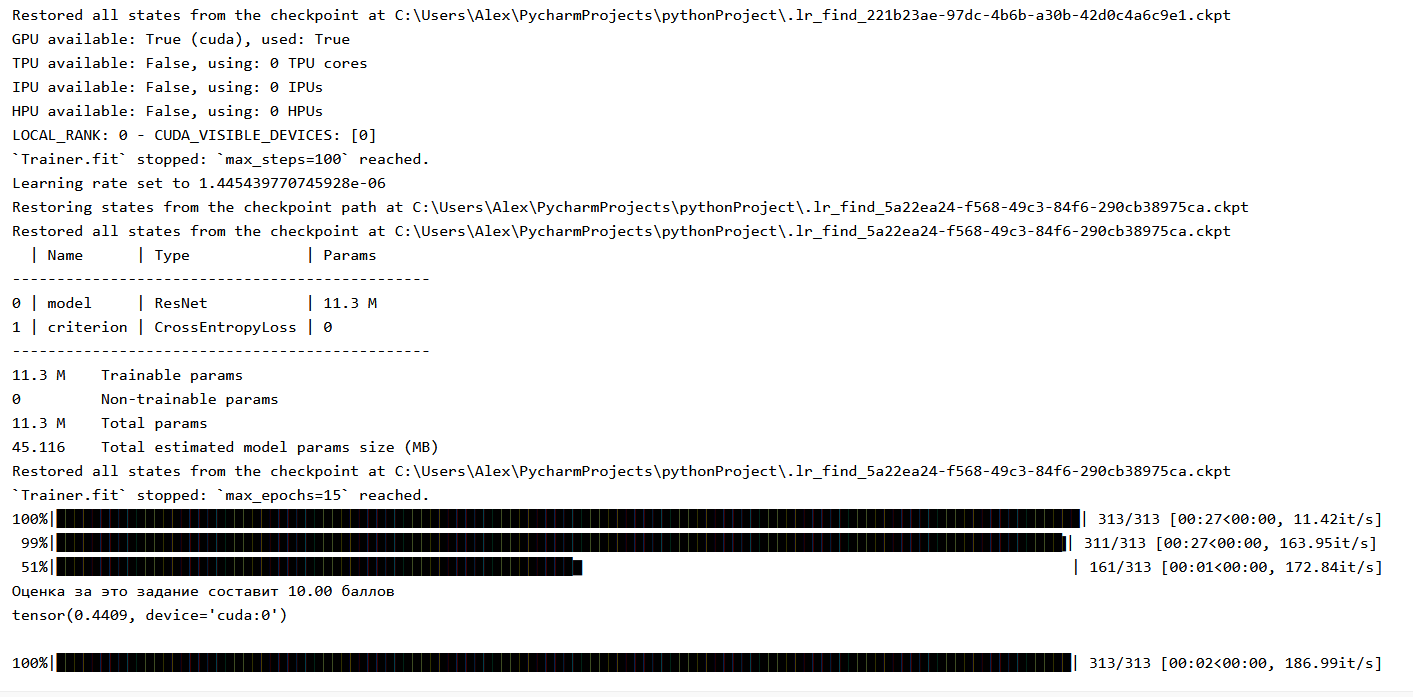

In [ ]:
# 2 задание - по сути, перебор больших моделей

# 1) https://wandb.ai/miraellax/lightning_logs/runs/u1jrdvyq
# Базовая модель resnet18 -> acc = 0

# 2) https://wandb.ai/miraellax/lightning_logs/runs/zzqlfmeq
# Оценка за это задание составит 0.01 баллов
# accuracy tensor(0.5004, device='cuda:0')
# Первый результат, все тесты до этого - я пыталась посчитать качество модели без последнего слоя. Дальше пробуем обучать больше просто.

# 3) https://wandb.ai/miraellax/lightning_logs/runs/vojm3yqi
# Запустила полное обучение предобученной resnet50 с замененным последним слоем. 10 эпох.
# accuracy tensor(0.344, device='cuda:0')

# 4) https://wandb.ai/miraellax/lightning_logs/runs/pqq0m6c8
# resnet34 - обучение только последнего слоя
# 3 эпохи - tensor(0.4906, device='cuda:0')

# 6 эпох - Оценка за это задание составит 2.75 баллов
# tensor(0.5934, device='cuda:0')

# 9 эпох - переобучаемся, Оценка за это задание составит 1.19 баллов
# tensor(0.5403, device='cuda:0')
# Уменьшаю starting_factor LinearScheduler с 0,1 до 0,01

# 12 эпох - Оценка за это задание составит 2.70 баллов
# tensor(0.5918, device='cuda:0')

# 15 Оценка за это задание составит 2.67 баллов
# tensor(0.5908, device='cuda:0')

# Попробуем дальше обучить вместе со всеми слоями, потому что только последний не получается обучиь лучше
# Оценка за это задание составит 0.00 баллов
# tensor(0.0727, device='cuda:0')

# 4.2) https://wandb.ai/miraellax/lightning_logs/runs/ztahmnln
# Продолжение обучения модели с оценкой 2.75 - качество падает
# Оценка за это задание составит 0.00 баллов
# tensor(0.0478, device='cuda:0')

# 5) https://wandb.ai/miraellax/lightning_logs/runs/qczur74y
# resnet152, обучение только последнего слоя
# 3 эпохи - Оценка за это задание составит 2.31 баллов
# tensor(0.5784, device='cuda:0')

# 6 эпох - Оценка за это задание составит 3.24 баллов
# tensor(0.6100, device='cuda:0')

# 9 эпох - Оценка за это задание составит 3.54 баллов
# tensor(0.6202, device='cuda:0')

# 29 эпох - Оценка за это задание составит 3.90 баллов
# tensor(0.6325, device='cuda:0')

# 31 - Оценка за это задание составит 3.96 баллов
# tensor(0.6348, device='cuda:0')

# 37 - Оценка за это задание составит 3.98 баллов 
# tensor(0.6354, device='cuda:0')
# Хожу вокруг локального минимума, сильно лучше уже не будет с оставшимся временем

# 39 - Оценка за это задание составит 4.13 баллов - забыла сохранить
# tensor(0.6404, device='cuda:0')

# 40 - Оценка за это задание составит 4.07 баллов - 49_mark4_07.pth
# tensor(0.6385, device='cuda:0')

# 41 - Оценка за это задание составит 4.04 баллов
# tensor(0.6374, device='cuda:0')
